<a href="https://colab.research.google.com/github/tlmartiner/Integracion_de_datos_y_prospectiva/blob/main/4_Integraci%C3%B3n_A_R_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de estudio**

Una empresa del sector Bancario (Bancolombia) ha comprado 3 Fintech (Fintech 1, Fintech 2, Fintech 3). Bancolombia queire saber cuales clientes son suceptibles de hacer parte de su cartera de créditos. Para eso quiere hacer un integración de datos para estos clientes nuevos potenciales, utilizando como referencia la variable Ingresos. Las variables de trabajo son las siguientes:

* Ingresos: Es una variable que determina los ingresos de una persona por efecto de sus actividades comerciales.

0. Se cargan las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

1. Se cargan los datos de integración

In [ ]:
# Conexión con mi unidad en Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nxl = '/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/3. DB_Fintechs (USD)_Integración.xlsx'

XDBo = pd.read_excel(nxl, sheet_name=0)
XDBF1 = pd.read_excel(nxl, sheet_name=1)

XDo = np.array(XDBo['Ingresos'])
XDF1 = np.array(XDBF1['Ingresos'])

2. Se calculan las métricas estádisticas

In [ ]:
uo = np.mean(XDo); uf1 = np.mean(XDF1)
sigmao = np.std(XDo); sigmaf1 = np.std(XDF1)
print("El coeficiente de asimetría Original:", skew(XDo))
print("El coeficiente de curtosis Original:", kurtosis(XDo))

#Se procede con la integración de los datos externos

XDInt = []

for k in range(len(XDF1)):
  print(XDF1[k]) #Para mirar todos los datos del F1
  x = XDF1 [k] #Dato a integrar
  VPo = np.exp(-0.5*((x-uo)/sigmao)**2)
  VPf1 = np.exp(-0.5*((x-uf1)/sigmaf1)**2)

  if VPf1<VPo and VPo>0.95:  #Escoger lo que tienen un valor de petenencia por encima del 90% con respecto a
                              #los datos para que no dañe los coeficientes
                              #Asegura que los datos sean confiables con respecto a los datos observados
    XDInt.append(x)
    print("El dato de integración está en la fila:", k)
  else:
    print("El dato no se integra")


El coeficiente de asimetría Original: [0.82593437]
El coeficiente de curtosis Original: [0.44725328]
153.2055
El dato no se integra
105.00425
El dato no se integra
185.24475
El dato no se integra
609.928
El dato no se integra
344.889
El dato no se integra
1248.617
El dato no se integra
157.64225
El dato no se integra
1490.9735
El dato no se integra
984.91125
El dato no se integra
1239.47525
El dato no se integra
904.17125
El dato no se integra
960.074
El dato no se integra
290.16175
El dato no se integra
1385.92925
El dato no se integra
158.028
El dato no se integra
460.38
El dato no se integra
1303.9315
El dato no se integra
393.74025
El dato no se integra
762.31375
El dato de integración está en la fila: 18
426.9765
El dato no se integra
329.69175
El dato no se integra
572.70325
El dato no se integra
2.7555
El dato no se integra
417.59925
El dato no se integra
554.745
El dato no se integra
706.635
El dato no se integra
832.66725
El dato de integración está en la fila: 26
138.61975
El

3. Se procede con la integración de datos

In [ ]:
XDo = np.array(XDo).reshape(-1,1)      #Quitar estructura al array
XDInt = np.array(XDInt).reshape(-1,1)  #Quitar estructura al array

XDT = np.concatenate((XDo, XDInt), axis=0)  #Base de datos total

#El número de datos integrado es:
nint = len(XDT) - len(XDo)

#Evaluamos las métricas
print("El coeficiente de asimetría para los observados;", skew(XDo))
print("El coeficiente de curtosis para los observados:", kurtosis(XDo))
print("El coeficiente de asimetría para los integrado;", skew(XDT))
print("El coeficiente de curtosis para los integrado:", kurtosis(XDT))

El coeficiente de asimetría para los observados; [0.82593437]
El coeficiente de curtosis para los observados: [0.44725328]
El coeficiente de asimetría para los integrado; [0.82423155]
El coeficiente de curtosis para los integrado: [0.81864666]


4. Se grafican los datos

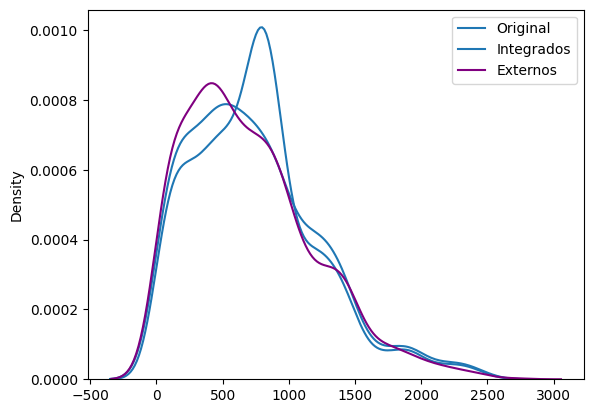

In [ ]:
plt.figure()
sns.kdeplot(XDo, label = 'Original', color = 'green')
sns.kdeplot(XDT, label='Integrados', color = 'red')
sns.kdeplot(XDF1, label = 'Externos', color = 'purple')
plt.legend()
plt.show()